In [1]:
import torch
import numpy as np

import os
os.chdir('..')
from torch_geometric.loader import DataLoader
from gnn_library.util import train, save, load
from evaluate import evaluate_model, pp_output
import instance_generator as ig
import torch_converter as tc
import evaluate as ev
import osmnx as ox
from util import Dataset

%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

PyTorch has version 1.12.0+cu102
Using device: cuda:0


In [3]:
args = {
    'processor':         'GENConv',
    'head':              'regression',
    'num_layers':        2,
    'num_mlp_layers':    2,
    'aggr':              'max',
    'batch_size':        32,
    'node_feature_dim':  4,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        64,
    'output_dim':        1,
    'dropout':           0.35,
    'epochs':            25,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device
}

train_num = 100; test_num = 30

er_config = {
    'graph_type': 'ER',
    'p': 1,
    'weighted': True
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 2,
    'weighted': True
}
geom_config = {
    'graph_type': 'GEOM',
    'threshold': 0.2,
    'scaling': 1 / np.sqrt(2)
}

rng = np.random.default_rng()


train_instances = [
        *ig.sample_instances(9, 7, train_num, rng, **er_config),
        *ig.sample_instances(9, 7, train_num, rng, **ba_config),
        *ig.sample_instances(9, 7, train_num, rng, **geom_config),
    ]

test_instances = [
        *ig.sample_instances(9, 7, test_num, rng, **er_config),
        *ig.sample_instances(9, 7, test_num, rng, **ba_config),
        *ig.sample_instances(9, 7, test_num, rng, **geom_config),
    ]


train_data = Dataset(tc._instances_to_train_samples(train_instances, args['head']))
test_data = Dataset(tc._instances_to_train_samples(test_instances, args['head']))

train_loader = DataLoader(
    train_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    test_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

In [4]:
_, _, GNN, _ = train(train_loader, test_loader, args)

Training:   0%|          | 0/25 [00:00<?, ?Epochs/s]/home/alexhay/.local/lib/python3.10/site-packages/torch_geometric/utils/scatter.py:93: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(f"The usage of `scatter(reduce='{reduce}')` "


0.09270249410456553


Training:   4%|▍         | 1/25 [00:03<01:28,  3.67s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.04022132605314255


Training:   8%|▊         | 2/25 [00:06<01:07,  2.95s/Epochs]

0.05023890139415628
0.03616150247782107


Training:  12%|█▏        | 3/25 [00:09<01:10,  3.21s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.01895955763757229


Training:  16%|█▌        | 4/25 [00:12<01:01,  2.92s/Epochs]

0.03035742822434088
0.026108446229165305


Training:  20%|██        | 5/25 [00:15<01:01,  3.09s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.014448091387748718


Training:  24%|██▍       | 6/25 [00:17<00:54,  2.85s/Epochs]

0.023623614405738624
0.021102841385031698


Training:  28%|██▊       | 7/25 [00:21<00:54,  3.03s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.01310906745493412


Training:  32%|███▏      | 8/25 [00:23<00:48,  2.88s/Epochs]

0.020244684367338953
0.019413553730324815


Training:  36%|███▌      | 9/25 [00:27<00:47,  2.98s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.012362548150122166


Training:  40%|████      | 10/25 [00:29<00:42,  2.81s/Epochs]

0.018031863427916267
0.017561818224473162


Training:  44%|████▍     | 11/25 [00:32<00:42,  3.02s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.011288085952401161


Training:  48%|████▊     | 12/25 [00:35<00:36,  2.79s/Epochs]

0.016861126830791683
0.015494288844371172


Training:  52%|█████▏    | 13/25 [00:38<00:35,  2.96s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.010873080231249332


Training:  56%|█████▌    | 14/25 [00:41<00:31,  2.84s/Epochs]

0.015649402543153466
0.015253651732227005


Training:  60%|██████    | 15/25 [00:44<00:29,  2.96s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.010572009719908237


Training:  64%|██████▍   | 16/25 [00:46<00:24,  2.75s/Epochs]

0.014764449444552642
0.014781551558259661


Training:  68%|██████▊   | 17/25 [00:50<00:23,  3.00s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.009678961709141731


Training:  72%|███████▏  | 18/25 [00:52<00:19,  2.85s/Epochs]

0.013736731978052617
0.013455699530447894


Training:  76%|███████▌  | 19/25 [00:56<00:18,  3.05s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.009148688055574894


Training:  80%|████████  | 20/25 [00:58<00:14,  2.88s/Epochs]

0.013203536010181057
0.013185927541071042


Training:  84%|████████▍ | 21/25 [01:02<00:12,  3.04s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.011066797189414501


Training:  88%|████████▊ | 22/25 [01:04<00:08,  2.87s/Epochs]

0.012840224013533089
0.012498346974095088


Training:  92%|█████████▏| 23/25 [01:08<00:06,  3.03s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.009984132833778858


Training:  96%|█████████▌| 24/25 [01:10<00:02,  2.91s/Epochs]

0.01266662621518768
0.012334264575970234


Training: 100%|██████████| 25/25 [01:14<00:00,  2.97s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.013666024431586266


In [5]:
# save(GNN, args, 'GNN3')

In [4]:
GNN, args = load('GNN1', device)

In [29]:
from gnn_library.OBM_greedy import OBM_Greedy
from gnn_library.OBM_threshold_greedy import OBM_Threshold_Greedy

thresholds = np.linspace(0, 1, 101)
thresholded_greedy_models = [(threshold, OBM_Threshold_Greedy(threshold)) for threshold in thresholds]

seed = np.random.randint(0, 500000)
(m, n) = (8, 16)
config = er_config

rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 10, rng, **config)

ratios2 = evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[GNN],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=5
)

greedy_ratios = {}
for threshold, model in thresholded_greedy_models: 
    ratio = evaluate_model(
        meta_model=None,
        meta_model_type=None,
        base_models=[model],
        instances=eval_instances,
        batch_size=50,
        rng=rng,
        num_realizations=5
    )
    greedy_ratios[threshold] = np.mean(ratio[0])
pp_output(ratios2, _, show_log=False)
print(greedy_ratios)

-- Competitive ratios --
GNN: 0.9636
Greedy: 0.9885
{0.0: 0.9898615618042509, 0.01: 0.9907709910901383, 0.02: 0.9887539926092364, 0.03: 0.9891676274354246, 0.04: 0.9898586878263498, 0.05: 0.990938270845992, 0.06: 0.9904176017204994, 0.07: 0.9899765849853635, 0.08: 0.9880349758723668, 0.09: 0.9879952614274231, 0.1: 0.989681245203079, 0.11: 0.9886036346015852, 0.12: 0.9871217923277287, 0.13: 0.9863221537454058, 0.14: 0.9888654934960949, 0.15: 0.9879433296107477, 0.16: 0.9875422404926317, 0.17: 0.9880758650369629, 0.18: 0.9880700809976964, 0.19: 0.9879087193599798, 0.2: 0.9874323341644633, 0.21: 0.9893074144673001, 0.22: 0.9890345277309092, 0.23: 0.9898226249117947, 0.24: 0.987906312586011, 0.25: 0.9886948340759419, 0.26: 0.9902531917477507, 0.27: 0.9893946399312814, 0.28: 0.9889402699855628, 0.29: 0.9884096584256516, 0.3: 0.9877675846833188, 0.31: 0.9889775818624698, 0.32: 0.9886088165977333, 0.33: 0.9910454797711672, 0.34: 0.989234042940331, 0.35000000000000003: 0.9882749581778839, 0.36

In [30]:
max_threshold = max(greedy_ratios, key = greedy_ratios.get)
print(max_threshold, greedy_ratios[max_threshold])

0.33 0.9910454797711672


# Pivot to feature-generated graphs

In [4]:
def get_location_graph(city):
	location_graph = ox.graph_from_place(city, network_type="drive")
	location_graph = ox.speed.add_edge_speeds(location_graph)
	location_graph = ox.speed.add_edge_travel_times(location_graph)
	return {'location_graph': location_graph, 'city': city}

In [8]:
piedmont = get_location_graph("Piedmont, California, USA")
# san_francisco = get_location_graph("San Francisco, California, USA")
founex = get_location_graph("Founex, Switzerland")
carmel = get_location_graph("Carmel, Indiana, USA")
geneva = get_location_graph("Geneva, Switzerland")

In [6]:
args = {
    'processor':         'GENConv',
    'head':              'regression',
    'num_layers':        2,
    'num_mlp_layers':    2,
    'aggr':              'max',
    'batch_size':        32,
    'node_feature_dim':  4,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        64,
    'output_dim':        1,
    'dropout':           0.35,
    'epochs':            25,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device
}

train_num = 100; test_num = 30

er_config = {
    'graph_type': 'ER',
    'p': 1,
    'weighted': True
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 2,
    'weighted': True
}
feat_config = {
    'graph_type': 'FEAT',
    'q': 0.85,
    'weighted': True
}
osmnx_config = {
    'graph_type': 'OSMNX',
    'location_graph': piedmont['location_graph']
}
# osmnx_config_2 = {
#     'graph_type': 'OSMNX',
#     'location_graph': san_francisco['location_graph']
# }

# ox.plot_graph(piedmont['location_graph'])
# ox.plot_graph(san_francisco['location_graph'])

# part_config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 4,
#     'eps': 0.1
# },
# part_config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 3,
#     'eps': 0.3
# }

rng = np.random.default_rng()


train_instances = [
        *ig.sample_instances(8, 8, train_num, rng, **er_config),
        *ig.sample_instances(8, 8, train_num, rng, **ba_config),
        *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        *ig.sample_instances(8, 8, train_num, rng, **osmnx_config),
        # *ig.sample_instances(8, 8, train_num, rng, **osmnx_config_2),
        # *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **part_config),
    ]

test_instances = [
        *ig.sample_instances(8, 8, test_num, rng, **er_config),
        *ig.sample_instances(8, 8, test_num, rng, **ba_config),
        *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        *ig.sample_instances(8, 8, train_num, rng, **osmnx_config),
        # *ig.sample_instances(8, 8, train_num, rng, **osmnx_config_2),
        # *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **part_config),
    ]


train_data = Dataset(tc._instances_to_train_samples(train_instances, args['head']))
test_data = Dataset(tc._instances_to_train_samples(test_instances, args['head']))

train_loader = DataLoader(
    train_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    test_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

In [7]:
_, _, GNN, _ = train(train_loader, test_loader, args)

Training:   0%|          | 0/25 [00:00<?, ?Epochs/s]/home/alexhay/.local/lib/python3.10/site-packages/torch_geometric/utils/scatter.py:93: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(f"The usage of `scatter(reduce='{reduce}')` "


67.21850687526839


Training:   4%|▍         | 1/25 [00:09<03:37,  9.08s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 66.75878143310547


Training:   8%|▊         | 2/25 [00:14<02:37,  6.83s/Epochs]

63.310256598754165
62.37302981923965


Training:  12%|█▏        | 3/25 [00:22<02:42,  7.39s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 65.02804565429688


Training:  16%|█▌        | 4/25 [00:27<02:17,  6.55s/Epochs]

60.61611939522335
62.84931703344114


Training:  20%|██        | 5/25 [00:36<02:24,  7.24s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 59.506526947021484


Training:  24%|██▍       | 6/25 [00:41<02:04,  6.54s/Epochs]

59.844293753686884
56.678374915820754


Training:  28%|██▊       | 7/25 [00:49<02:05,  7.00s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 59.25712585449219


Training:  32%|███▏      | 8/25 [00:54<01:48,  6.39s/Epochs]

58.30201186476446
55.673129292023035


Training:  36%|███▌      | 9/25 [01:02<01:49,  6.82s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 51.850059509277344


Training:  40%|████      | 10/25 [01:07<01:34,  6.27s/Epochs]

56.540013791009414
54.819624702736235


Training:  44%|████▍     | 11/25 [01:15<01:36,  6.89s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 59.464393615722656


Training:  48%|████▊     | 12/25 [01:20<01:21,  6.30s/Epochs]

56.5904537605879
55.58917078776769


Training:  52%|█████▏    | 13/25 [01:27<01:20,  6.69s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 57.06647872924805


Training:  56%|█████▌    | 14/25 [01:32<01:07,  6.16s/Epochs]

56.11624862683729
53.994485816655015


Training:  60%|██████    | 15/25 [01:40<01:06,  6.60s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 57.74656295776367


Training:  64%|██████▍   | 16/25 [01:45<00:54,  6.06s/Epochs]

50.488001926376775
52.03285601076015


Training:  68%|██████▊   | 17/25 [01:53<00:52,  6.62s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 53.22785186767578


Training:  72%|███████▏  | 18/25 [01:58<00:42,  6.10s/Epochs]

50.739156125789634
49.78068624964685


Training:  76%|███████▌  | 19/25 [02:05<00:39,  6.62s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 47.85764694213867


Training:  80%|████████  | 20/25 [02:10<00:30,  6.11s/Epochs]

49.623031099366386
47.938681736802685


Training:  84%|████████▍ | 21/25 [02:18<00:26,  6.65s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 45.53363037109375


Training:  88%|████████▊ | 22/25 [02:23<00:18,  6.10s/Epochs]

47.43521692161406
49.48835485868246


Training:  92%|█████████▏| 23/25 [02:31<00:13,  6.63s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 47.473880767822266


Training:  96%|█████████▌| 24/25 [02:36<00:06,  6.20s/Epochs]

50.70284325233738
47.717176400116784


Training: 100%|██████████| 25/25 [02:44<00:00,  6.59s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 51.11994552612305


## Set up the threshold greedy value
The instance set used to determine the threshold should be the same as the training set for the base models. Here we reduce the number of instances to make the evaluation faster.

For the moment, the instance set is the evaluation set since they are too different and would disadvantage threshold greedy.

In [9]:
from gnn_library.OBM_threshold_greedy import OBM_Threshold_Greedy
from tqdm import tqdm
seed = np.random.randint(0, 500000)
rng = np.random.default_rng(seed)


thresholds = np.linspace(0, 1, 101)
thresholds = np.linspace(0, 1, 2) # TODO remove
#TODO max value in threshold should be max value observable in graphs (is not the case for osmnx graphs for the moment)
thresholded_greedy_models = {threshold: OBM_Threshold_Greedy(threshold) for threshold in thresholds}

osmnx_config1 = {
    'graph_type': 'OSMNX',
    'location_graph': piedmont['location_graph']
}
osmnx_config2 = {
    'graph_type': 'OSMNX',
    'location_graph': geneva['location_graph']
}
osmnx_config3 = {
    'graph_type': 'OSMNX',
    'location_graph': carmel['location_graph']
}

train_num = 10
train_instances = [
        *ig.sample_instances(8, 8, train_num, rng, **osmnx_config1),
        *ig.sample_instances(8, 8, train_num, rng, **osmnx_config2),
        *ig.sample_instances(8, 8, train_num, rng, **osmnx_config3),
]

# train_instances = [
#         *ig.sample_instances(8, 8, train_num, rng, **er_config),
#         *ig.sample_instances(8, 8, train_num, rng, **ba_config),
#         *ig.sample_instances(8, 8, train_num, rng, **feat_config),
#         *ig.sample_instances(8, 8, train_num, rng, **osmnx_config),
# ]


greedy_ratios = {}
for threshold, model in tqdm(thresholded_greedy_models.items()): 
    rng = np.random.default_rng(seed)
    ratio = ev.evaluate_model(
        meta_model=None,
        meta_model_type=None,
        base_models=[model],
        instances=train_instances,
        batch_size=50,
        rng=rng,
        num_realizations=5
    )
    greedy_ratios[threshold] = np.mean(ratio[0])
    

max_threshold = max(greedy_ratios, key = greedy_ratios.get)
print(f"Best threshold value: {max_threshold} achieves CR: {greedy_ratios[max_threshold]}")
THRESHOLD_MODEL = thresholded_greedy_models[max_threshold]

  0%|          | 0/2 [00:00<?, ?it/s]

Set parameter TokenServer to value "soal-nas.stanford.edu"


100%|██████████| 2/2 [00:12<00:00,  6.32s/it]

Best threshold value: 0.0 achieves CR: 0.8930191215011637


In [10]:
print(greedy_ratios)

{0.0: 0.8930191215011637, 1.0: 0.8134945632327552}


## Evaluation

In [23]:
seed = np.random.randint(0, 500000)
(m, n) = (32, 16)
# config = {
#     'graph_type': 'FEAT',
#     'q': 0.85,
#     'weighted': True
# }
# config = {
#     'graph_type': 'OSMNX',
#     'location_graph': piedmont['location_graph']
# }
# config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 4,
#     'eps': 0.1
# }

rng = np.random.default_rng(seed)
# eval_instances = ig.sample_instances(m, n, 100, rng, **config)
eval_num = 25
eval_instances = [
        *ig.sample_instances(m, n, eval_num, rng, **er_config),
        *ig.sample_instances(m, n, eval_num, rng, **ba_config),
        *ig.sample_instances(m, n, eval_num, rng, **feat_config),
        *ig.sample_instances(m, n, eval_num, rng, **osmnx_config),
]

ratios = ev.evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[GNN],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=5
)


ratios2 = ev.evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[THRESHOLD_MODEL],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=5
)

pp_output(ratios, _, show_log=False)
print(f"Thresholded greedy: {np.mean(ratios2[0]).round(4)}")


-- Competitive ratios --
GNN: 0.8371
Greedy: 0.8441
LP-rounding: 0.9389
Thresholded greedy: 0.8402


In [10]:
num_trials = 40
node_configs = [(x, 16) for x in np.arange(4, 64, 4)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]
graph_configs = [
    # {
    #     'graph_type': 'GM'
    # },
    # {
    #     'graph_type': 'ER',
    #     'p': 0.75,
    #     'weighted': False
    # },
    # {
    #     'graph_type': 'BA',
    #     'ba_param': 4,
    #     'weighted': False
    # },
    {
        'graph_type': 'FEAT',
        'q': 0.75,
        'weighted': True
    },
    {
        'graph_type': 'FEAT',
        'q': 0.9,
        'weighted': True
    },
    {
        'graph_type': 'FEAT',
        'q': 0.95,
        'weighted': True
    },

    # {
    #     'graph_type': 'PART',
    #     'p': 0.5,
    #     'size': 4,
    #     'eps': 0.1
    # },
    # {
    #     'graph_type': 'PART',
    #     'p': 0.5,
    #     'size': 3,
    #     'eps': 0.3
    # }
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)

data = {config['q']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(graph_config, node_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, **graph_config)


        rng = np.random.default_rng(seed)
        gnn_learned_ratios, greedy_ratios, lp_match_ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )


        data[graph_config['q']].append(np.array(
            [
                gnn_learned_ratios,
                greedy_ratios,
                lp_match_ratios
            ]
        ))

[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75]
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (4, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (8, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (12, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (16, 16)


/home/alexhay/GNN-OBM/algorithms.py:255: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom_matrix


{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (20, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (24, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (28, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (32, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (36, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (40, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (44, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (48, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (52, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (56, 16)


KeyboardInterrupt: 

In [12]:
num_trials = 40
node_configs = [(x, 16) for x in np.arange(4, 64, 8)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]




graph_configs = [
    # {
    # 'graph_type': 'FEAT',
    # 'q': 0.5
    # },
    # {
    #     'graph_type': 'OSMNX',
    #     'location_graph': piedmont['location_graph'],
    #     'city': piedmont['city']
    # },
    # {
    #     'graph_type': 'OSMNX',
    #     'location_graph': carmel['location_graph'],
    #     'city': carmel['city']
    # },
    # {
    #     'graph_type': 'OSMNX',
    #     'location_graph': geneva['location_graph'],
    #     'city': geneva['city']
    # },
    # {
    #     'graph_type': 'OSMNX',
    #     'location_graph': founex['location_graph'],
    #     'city': founex['city']
    # },
    # {
    # 'graph_type': 'FEAT',
    # 'q': 0.75,
    # 'weighted': True
    # },
    # {
    # 'graph_type': 'FEAT',
    # 'q': 0.9,
    # 'weighted': True
    # },
    # {
    # 'graph_type': 'FEAT',
    # 'q': 0.95,
    # 'weighted': True
    # },
    # {
    # 'graph_type': 'FEAT',
    # 'q': 0.99
    # }
    # {
    #     'graph_type': 'PART',
    #     'p': 0.5,
    #     'size': 4,
    #     'eps': 0.1
    # },
    # {
    #     'graph_type': 'PART',
    #     'p': 0.5,
    #     'size': 3,
    #     'eps': 0.3
    # }
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)

data = {config['city']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(node_config, graph_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, **graph_config)


        rng = np.random.default_rng(seed)
        gnn_learned_ratios, greedy_ratios, lp_match_ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )
        thresholded_greedy_ratios = [0]

        # thresholded_greedy_ratios, greedy_ratios, lp_match_ratios = evaluate_model(
        #     meta_model=None,
        #     meta_model_type=None,
        #     base_models=[THRESHOLD_MODEL],
        #     instances=instances,
        #     batch_size=batch_size,
        #     rng=rng,
        #     num_realizations=5
        # )

        data[graph_config['city']].append(np.array(
            [
                gnn_learned_ratios,
                thresholded_greedy_ratios,
                greedy_ratios,
                lp_match_ratios
            ]
        ))

[0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75]
(4, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395b490>, 'city': 'Founex, Switzerland'}


/tmp/ipykernel_2158288/1678089274.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data[graph_config['city']].append(np.array(


(12, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395b490>, 'city': 'Founex, Switzerland'}
(20, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395b490>, 'city': 'Founex, Switzerland'}


/home/alexhay/GNN-OBM/algorithms.py:255: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom_matrix


(28, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395b490>, 'city': 'Founex, Switzerland'}
(36, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395b490>, 'city': 'Founex, Switzerland'}
(44, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395b490>, 'city': 'Founex, Switzerland'}
(52, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395b490>, 'city': 'Founex, Switzerland'}
(60, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395b490>, 'city': 'Founex, Switzerland'}


[0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75]


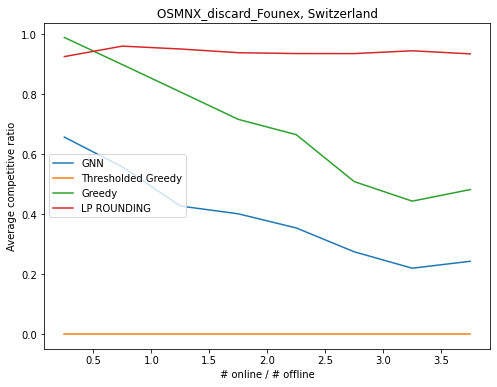

In [13]:
import matplotlib.pyplot as plt
ratios = [x/y for (x,y) in node_configs]
print(ratios)
for city, comp_ratios in data.items():
    greedy_avg_ratios = []
    thresholded_greedy_avg_ratios = []
    gnn_avg_ratios = []
    lp_match_avg_ratios = []


    for trial_ratios in comp_ratios:
        gnn_avg_ratios.append(np.array(trial_ratios[0]).mean())
        thresholded_greedy_avg_ratios.append(np.array(trial_ratios[1]).mean())
        greedy_avg_ratios.append(np.array(trial_ratios[2]).mean())
        lp_match_avg_ratios.append(np.array(trial_ratios[3]).mean())
        

    title = f"OSMNX_discard_{city}"
    fig = plt.figure(figsize=(8,6))
    plt.title(title)
    plt.plot(ratios, gnn_avg_ratios, label='GNN')
    plt.plot(ratios, thresholded_greedy_avg_ratios, label='Thresholded Greedy')
    plt.plot(ratios, greedy_avg_ratios, label='Greedy')
    plt.plot(ratios, lp_match_avg_ratios, label='LP ROUNDING')
    plt.xlabel('# online / # offline')
    plt.ylabel('Average competitive ratio')
    plt.legend()
    plt.savefig(f"data/{title}.png")
    plt.show()



FEAT_only_ratings_0.75


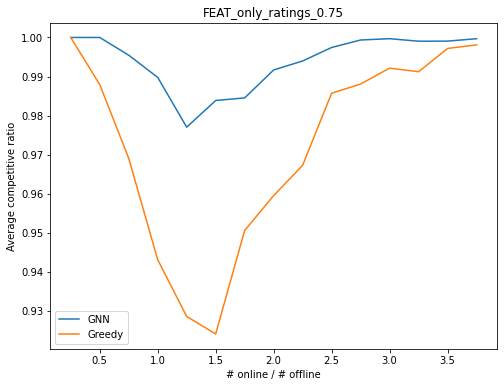

FEAT_only_ratings_0.9


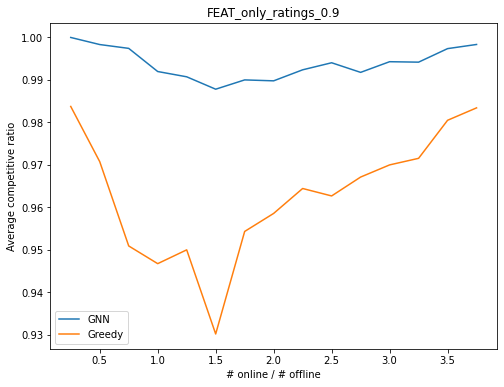

FEAT_only_ratings_0.95


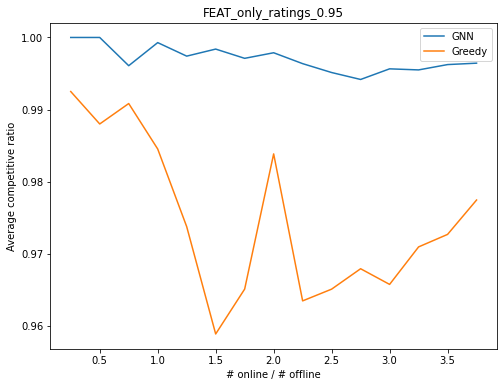

In [9]:
import matplotlib.pyplot as plt
ratios = [x/y for (x,y) in node_configs]
for q, comp_ratios in data.items():
    greedy_avg_ratios = []
    gnn_avg_ratios = []


    for trial_ratios in comp_ratios:
        gnn_avg_ratios.append(np.array(trial_ratios[0]).mean())
        greedy_avg_ratios.append(np.array(trial_ratios[1]).mean())

    # title = f"PART_size_{size}"
    title = f"FEAT_only_ratings_{q}"
    print(title)
    fig = plt.figure(figsize=(8,6))
    plt.title(title)
    plt.plot(ratios, gnn_avg_ratios, label='GNN')
    plt.plot(ratios, greedy_avg_ratios, label='Greedy')
    plt.xlabel('# online / # offline')
    plt.ylabel('Average competitive ratio')
    plt.legend()
    plt.savefig(f"data/{title}.png")
    plt.show()
